# Preperation Random Data

In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Rectangle
import collections
pd.options.display.html.table_schema = True

from sklearn.cluster import KMeans

from random import *
from time import *

In [2]:
import re
import sys
import networkx as nx

In [3]:
df = pd.DataFrame(np.random.randint(0, 1000, size=(5000, 4)), columns=list(['x1', 'x2', 'y1', 'y2']))

In [4]:
col_name = df.columns.tolist()
col_name.insert(1, 'group')
df = df.reindex(columns=col_name)

In [5]:
xn = np.random.normal(500, 350, 5000)           #create normal distribution for destination
yn = np.random.normal(500, 350, 5000)           #create normal distribution for destination

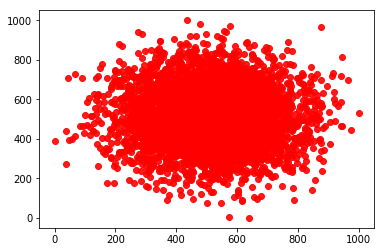

In [6]:
xnr = [(i-min(xn))/(max(xn)-min(xn)) * 1000 for i in xn]    # xnr is between 0 and 1
ynr = [(i-min(yn))/(max(yn)-min(yn)) * 1000 for i in yn]     # ynr is between 0 and 1
plt.scatter(xnr, ynr, color='r', alpha=0.9)

In [7]:
df.x2 = xnr
df.y2 = ynr

In [8]:
df.head()

,x1,group,x2,y1,y2
0,515,NaN,344.309414,192,542.840661
1,672,NaN,616.617340,391,372.646698
2,354,NaN,536.645354,301,589.164789
3,861,NaN,584.326905,214,575.386974
4,530,NaN,301.080113,691,485.862678


In [9]:
df['group'] = np.random.randint(5, size = 5000)
df['group_x1'] = None
df['group_x2'] = None
df['group_y1'] = None
df['group_y2'] = None

### create random time and time slots

In [ ]:
df['start_time'] = None
df['start_year']=None
df['start_month']=None
df['start_day']=None
df['strat_hour']=None
df['start_minute']=None
df['start_second']=None
df['end_time'] = None
df['end_year']=None
df['end_month']=None
df['end_day']=None
df['end_hour']=None
df['end_minute']=None
df['end_second']=None

In [ ]:
def build_time(date1,date2):
    time1 = mktime(date1)
    time2 = mktime(date2)
    random_time1 = uniform(time1,time2)
    random_time2 = uniform(random_time1,time2)
    time1 = asctime(localtime(random_time1))
    time2 = asctime(localtime(random_time2))
    year1=localtime(random_time1)[0]
    year2=localtime(random_time2)[0]
    month1=localtime(random_time1)[1]
    month2=localtime(random_time2)[1]
    day1=localtime(random_time1)[2]
    day2=localtime(random_time2)[2]
    hour1=localtime(random_time1)[3]
    hour2=localtime(random_time2)[3]
    minute1=localtime(random_time1)[4]
    minute2=localtime(random_time2)[4]
    second1=localtime(random_time1)[5]
    second2=localtime(random_time2)[5]
    return time1, time2, year1, year2, month1, month2, day1, day2, hour1, hour2, minute1, minute2, second1, second2
    
if __name__ == "__main__":
    date1 = (2018,1,1,0,0,0,-1,-1,-1)
    date2 = (2018,1,1,23,59,59,-1,-1,-1)
    #a,b,c,d,e,f,g,h,i,j,k,l= df.apply(lambda row:build_time(date1, date1), axis=1)
    #build_time
    #df['start_time'],df['end_time'],df['start_month'],df['end_month'],df['start_day'], df['end_day'],\
    #df['start_hour'],df['end_hour'],df['start_minute'], df['end_minute'], df['start_second'],df['end_second'] \
    d=df.apply(lambda row:build_time(date1, date2), axis=1)
    for i in range(len(df)):
        df.start_time[i] = d[i][0]
        df.start_year[i]=d[i][2]
        df.start_month[i]=d[i][4]
        df.start_day[i]=d[i][6]
        df.strat_hour[i]=d[i][8]
        df.start_minute[i]=d[i][10]
        df.start_second[i]=d[i][12]
        df.end_time[i] = d[i][1]
        df.end_year[i]=d[i][3]
        df.end_month[i]=d[i][5]
        df.end_day[i]=d[i][7]
        df.end_hour[i]=d[i][9]
        df.end_minute[i]=d[i][11]
        df.end_second[i]=d[i][13]
    #a=build_time(date1, date1)
    #b = lambda row:build_time(date1, date1)

C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

### create duration attribute

In [ ]:
df['duration']=None
df['duration']=df.apply(lambda row:(mktime(strptime(row['end_time']))-mktime(strptime(row['start_time'])))/60/60, axis=1)

### Add distance and distance_category

In [ ]:
df['distance'] = None
df['distance_category'] = None
for i in range(len(df.start_time)):
    df.distance[i] = ((df.y2[i] - df.y1[i])**2 + (df.x2[i] - df.x1[i])**2)**0.5
    if df.distance[i]>0 and df.distance[i]<=330:
        df.distance_category[i]='short'
    if df.distance[i]>330 and df.distance[i]<=660:
        df.distance_category[i]='medium'
    if df.distance[i]>660:
        df.distance_category[i]='long'

### create speed attribute

In [ ]:
df['speed']=None
df['speed']=df.apply(lambda row:(row['distance']/((mktime(strptime(row['end_time']))-mktime(strptime(row['start_time']))))), axis=1)

### calculate group_x1, group_x2, group_x3 and group_x4, which are the number that all Os and Ds belong to in girds of axis x and axis y

In [ ]:
def create_grid_x(x):
     if x != 1000:
        return x // 200
     else:
        return 4
    
def create_grid_y(x):
     if  x != 0:
        return (1000 - x) // 200
     else:
        return 4

if __name__ == "__main__":
    df['group_x1']=df.apply(lambda row:create_grid_x(row['x1']), axis=1)
    df['group_x2']=df.apply(lambda row:create_grid_x(row['x2']), axis=1)
    df['group_y1']=df.apply(lambda row:create_grid_y(row['y1']), axis=1)
    df['group_y2']=df.apply(lambda row:create_grid_y(row['y2']), axis=1)

### Add cell_group_origin

In [ ]:
df['cell_group_origin']=None

def create_grid_group(x1, y1):
    a = str(int(x1))
    b = str(int(y1))
    return 'cell_' + a.zfill(2) + '_' + b.zfill(2)
if __name__ == "__main__":
    df['cell_group_origin']=df.apply(lambda row:create_grid_group(row['group_x1'], row['group_y1']), axis=1)

### Add cell_group_destination

In [ ]:
df['cell_group_destination']=None

def create_grid_group(x1, y1):
    a = str(int(x1))
    b = str(int(y1))
    return 'cell_' + a.zfill(2) + '_' + b.zfill(2)

if __name__ == "__main__":
    df['cell_group_destination']=df.apply(lambda row:create_grid_group(row['group_x2'], row['group_y2']), axis=1)

In [ ]:
df.head()

### Add orientation_4 attribute

In [ ]:
def calculate_orientation_category(x1, y1, x2, y2):
    a=y2-y1
    b=x2-x1
    if b!=0:
        if (a/b>1 or a/b<-1) and a>0:
            return 'N'
        if (a/b<1 and a/b>-1) and b>0:
            return 'E'
        if (a/b>1 or a/b<-1) and a<0:
            return 'S'
        if (a/b<1 and a/b>-1) and b<0:
            return 'W'
    if b==0 and a>0:
        return 'N'
    if b==0 and a<0:
        return 'S'
    if b==0 and a==0:
        return 'C'
        
if __name__ == "__main__":
    df['orientation_4']=df.apply(lambda row:calculate_orientation_category(row['x1'], row['y1'],row['x2'],row['y2']), axis=1)

### Add orientation_8

In [ ]:
df['orientation_8']=None

def calculate_orientation_8_category(x1, y1, x2, y2):
    a=y2-y1
    b=x2-x1
    if b!=0:
        if (a/b>1 or a/b<-1) and a>0 and b > 0:
            return 'N-E'
        if (a/b>1 or a/b<-1) and a>0 and b < 0:
            return 'N-W'
        
        if (a/b<1 and a/b>-1) and b>0 and a > 0:
            return 'E-N'
        if (a/b<1 and a/b>-1) and b>0 and a < 0:
            return 'E-S'
        
        if (a/b>1 or a/b<-1) and a<0 and b > 0:
            return 'S-E'
        if (a/b>1 or a/b<-1) and a<0 and b < 0:
            return 'S-W'
        
        if (a/b<1 and a/b>-1) and b<0 and a > 0:
            return 'W-N'
        if (a/b<1 and a/b>-1) and b<0 and a < 0:
            return 'W-S'
        
    if b==0 and a>0:
        return 'N'
    if b==0 and a<0:
        return 'S'
    if b==0 and a==0:
        return 'C'
        
if __name__ == "__main__":
    df['orientation_8']=df.apply(lambda row:calculate_orientation_8_category(row['x1'], row['y1'],row['x2'],row['y2']), axis=1)

### Add duration_category attribute

In [ ]:
df['duration_category']=None

def calculate_duration_category(x):
    if x>=0 and x<10:
        return 'short'
    if x>=10 and x<20:
        return 'medium'
    else:
        return 'long'
    
if __name__ == "__main__":
    df['duration_category']=df.apply(lambda row:calculate_duration_category(row['duration']), axis=1)

### Create speed_category

In [ ]:
df['speed_category']=None

def calculate_speed_category(x):   
    if x>=0 and x<150:
        return 'slow'
    if x>=150 and x<300:
        return 'medium'
    else:
        return 'fast'
    
    
if __name__ == "__main__":
    df['speed_category']=df.apply(lambda row:calculate_speed_category(row['speed']), axis=1)

### Add bi_start_hour

In [ ]:
x1 = np.concatenate((np.random.normal(8, 2, 2500),np.random.normal(18, 2, 2500)))[:, np.newaxis]
x2 = [(i-min(x1))/(max(x1)-min(x1)) for i in x1]    # x2 is between 0 and 1
x3 = [int(i*23)  for i in x2]
df['bi_start_hour'] = x3
plt.hist(x3,bins=24)

### Add bi_start_minuter

In [ ]:
x1 = np.concatenate((np.random.normal(28, 4, 2500),np.random.normal(49, 4, 2500)))[:, np.newaxis]
x2 = [(i-min(x1))/(max(x1)-min(x1)) for i in x1]    # x2 is between 0 and 1
x3 = [int(i*59)  for i in x2]
df['bi_start_minute'] = x3
plt.hist(x3, bins = 60)

### Add bi_start_minute

In [ ]:
x1 = np.concatenate((np.random.normal(28, 4, 2500),np.random.normal(49, 4, 2500)))[:, np.newaxis]
x2 = [(i-min(x1))/(max(x1)-min(x1)) for i in x1]    # x2 is between 0 and 1
x3 = [int(i*59)  for i in x2]
df['bi_start_minute'] = x3
plt.hist(x3, bins = 60)

### Add bi_start_second

In [ ]:
x1 = np.concatenate((np.random.normal(28, 4, 2500),np.random.normal(49, 4, 2500)))[:, np.newaxis]
x2 = [(i-min(x1))/(max(x1)-min(x1)) for i in x1]    # x2 is between 0 and 1
x3 = [int(i*59)  for i in x2]
df['bi_start_second'] = x3
plt.hist(x3, bins = 60)

### Add bi_start_time, bi_start_year, bi_start_month, bi_start_day

In [ ]:
df['bi_start_year'] = df.start_year
df['bi_start_month'] = df.start_month
df['bi_start_day'] = df.start_day

In [ ]:
def calculate_time(x,y,z):
    date1 = [2018,1,1, x, y, z,-1,-1,-1]
    date = tuple(date1)
    time1 = mktime(date)
    time2 = asctime(localtime(time1))
    return time2
    
if __name__ == "__main__":
    df['bi_start_time']=df.apply(lambda row:calculate_time(row['bi_start_hour'],row['bi_start_minute'],row['bi_start_second']), axis=1)

In [ ]:
df.head()

### Build the OD index

In this part, we build od_index to save rows index in each OD pairs, which is to find each OD pair includes which raws that exist in dataset.

In [221]:
# create a empty list of OD index, which is to make the relation between grids and each row of dataset
od_index = [ [[] for col in range(25)] for row in range(25)]

# import data into od_index list. in od_index, a_x and a_y are coordinates in grid method, 
# each od_index cell includes an array that are rows of dataset df that belong to this coordinat
for i in range(len(df.group)):
    a_x = df.group_x1[i] * 5 + df.group_x2[i]
    a_x = int(a_x)
    a_y = df.group_y1[i] * 5 + df.group_y2[i]
    a_y = int(a_y)
    od_index[a_x][a_y] = np.append(od_index[a_x][a_y],i)





### Extract those rows in dataset corresponding to each OD pairs 


Extract rows in dataset corresponding to each OD pairs

create a grid + time + count index

In [223]:
# build a list, to add count of OD pairs in each time slot
time_count = [ [[] for col in range(25)] for row in range(25)]


# import data into time_count list. in time_count, i and j are coordinates in grid method, 
# each time_count cell includes an array that are count of OD pairs  belonging to this coordinat in each time slot
for i in range(25):
    for j in range(25):
        one_od_data = df.iloc[od_index[i][j]]
        time_slot = one_od_data.time.values
        a = collections.Counter(time_slot)
        if len(time_count) == 0:
            time_count[i][j] = [0,0,0]
        time_count[i][j] = [a[0],a[1],a[2]]

### Distribution of links

Draw OD as links 

In [ ]:
plt.figure('asdf')
aa = plt.gca()
aa.plot([df.x1, df.x2], [df.y1, df.y2], color='r', linewidth=0.3, alpha=0.9)
plt.show(aa)

### Draw destination points!

In [ ]:
plt.scatter(df.x2, df.y2, color='r', alpha=0.9)

### OD matrix 

Draw OD map prototype, in this prototype:

Those rectangles with thick lines are the first level, which represents origins

Those rectangles with thin lines are the second level, which represents destinations

In third level, I divide each grids into three parts in x-axis, and each one represents one time slot. Based on this fundamental width, I draw small rectangles and changing their highs to represent the count for each time slot

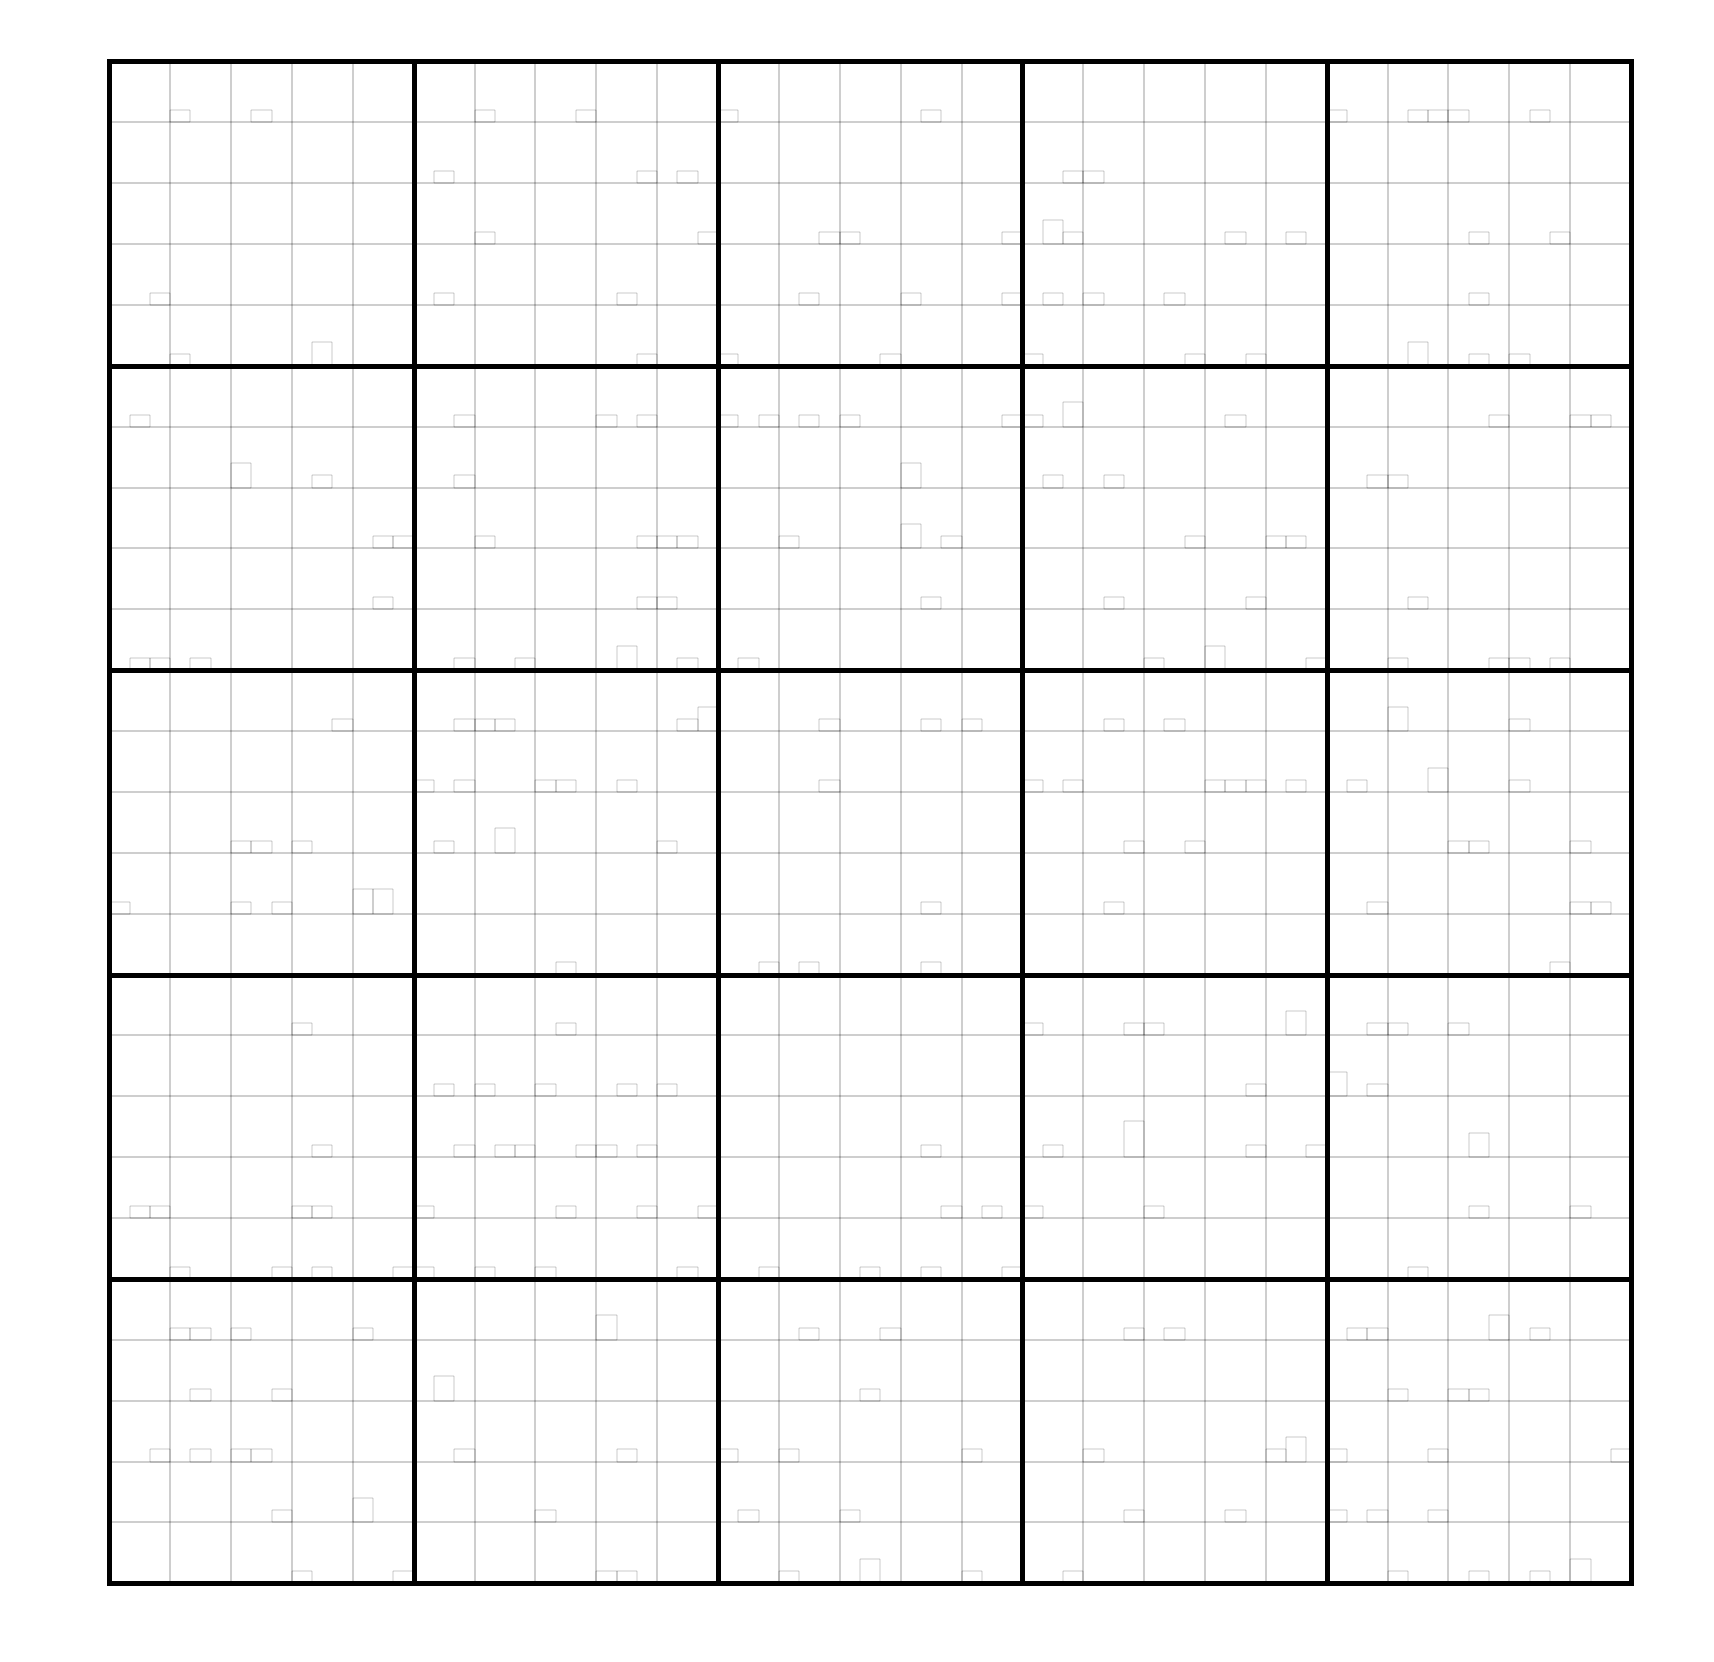

In [232]:
# fig = plt.figure()
fig, ax = plt.subplots(figsize=(30,30))
for i in range(25):
    for j in range(25):
        rect =  Rectangle((i * 10, j * 10), 10, 10, linewidth=0.2, fill=False, clip_on=True)
        ax.add_patch(rect)

for i in range(6):
    ax.plot([i * 50, 50 * i ], [0, 250], color='black', linewidth=5, alpha=1)
    ax.plot([0, 250], [50 * i, 50 * i], color='black', linewidth=5, alpha=1)
    
# draw third recursion Time with frequency for each OD pairs

for i in range(25):
    for j in range(25):
        if time_count[i][j][0] != 0:
            rect = Rectangle((i * 10, 240 - j*10), 10/3, time_count[i][j][0]*2, linewidth=0.2, fill=False, clip_on=True)
            ax.add_patch(rect)
        if time_count[i][j][1] != 0:
            rect = Rectangle((i * 10 + 10/3, 240 - j*10), 10/3, time_count[i][j][1]*2, linewidth=0.2, fill=False, clip_on=True)
            ax.add_patch(rect)
        if time_count[i][j][2] != 0:
            rect = Rectangle((i * 10 + 10/3 * 2, 240 - j*10), 10/3, time_count[i][j][2]*2, linewidth=0.2, fill=False, clip_on=True)
            ax.add_patch(rect)

ax.axis("equal")
ax.set_axis_off()
plt.show()

### Draw links based on groups

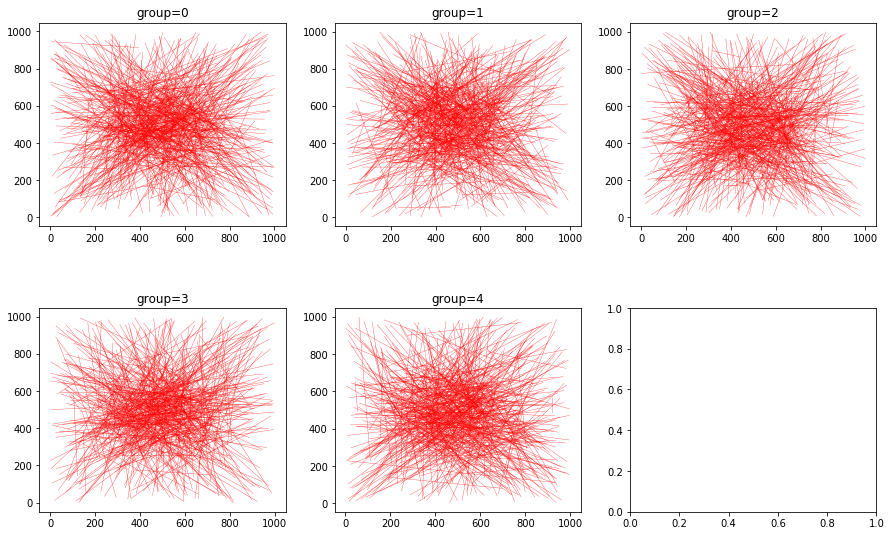

In [209]:
grouped = df.groupby('group')
rowlength = 3                         # fix up if odd number of groups
fig, axs = plt.subplots(figsize=(15,9), 
                        nrows=2, ncols=rowlength,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    ax.plot([grouped.get_group(key).x1,grouped.get_group(key).x2],[grouped.get_group(key).y1,grouped.get_group(key).y2],'r',linewidth=0.3, alpha=0.9)
    ax.set_title('group=%d'%key)
plt.show()

### Cluster

N = 10

Text(0.5, 1.0, 'Cluster of destinations')

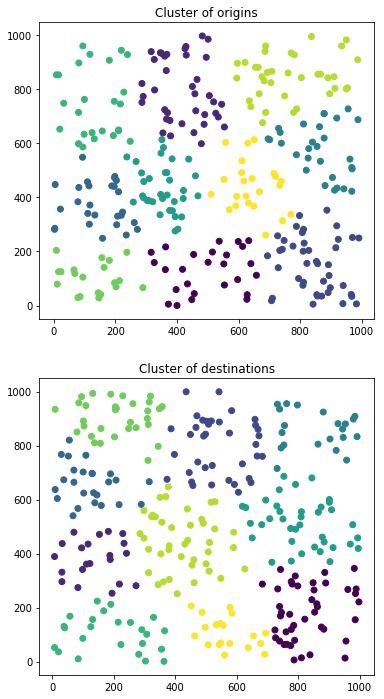

In [247]:
plt.figure(figsize=(6, 12))

X = np.zeros([len(df.time),2])
X[:,0] = df.x1.values.tolist()
X[:,1] = df.y1.values.tolist()

# Incorrect number of clusters
y_pred = KMeans(n_clusters=10, random_state=0).fit(X)

plt.subplot(211)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.labels_)
plt.title("Cluster of origins")

x_drop =  np.zeros([len(df.time),2])
x_drop[:,0] = df.x2.values.tolist()
x_drop[:,1] = df.y2.values.tolist()
y_pred_1 = KMeans(n_clusters=10, random_state=0).fit(x_drop)

plt.subplot(212)
plt.scatter(x_drop[:,0], x_drop[:,1], c=y_pred_1.labels_)
# plt.axis("equal")
plt.title('Cluster of destinations')

In [333]:
df1 = df.x1.tolist()
df2 = df.y1.tolist()
dfm = np.zeros([300, 2])
for i in range(len(dfm)):
    dfm[i,0] = df1[i]
    dfm[i,1] = df2[i]

from scipy.cluster.hierarchy import dendrogram, linkage  

linked = linkage(dfm, 'single')

labelList = range(1, 301)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

In [252]:
df['start_cluster10_label'] = y_pred.labels_
df['end_cluster10_label'] = y_pred_1.labels_

### Network diagram

In [285]:
G_index = df.groupby(['start_cluster10_label'], as_index = False)['start_cluster10_label'].agg({'cnt':'count'})

In [261]:
G_index.start_cluster10_label.values.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

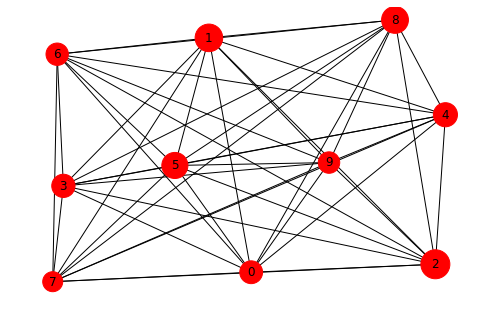

In [360]:
G = nx.Graph()
G.position = dict(zip(G_index.start_cluster10_label.values.tolist(),y_pred.cluster_centers_.tolist()))
G.count = dict(zip(G_index.start_cluster10_label.values.tolist(),G_index.cnt.values.tolist()))
for key in G.position.keys():
    G.add_node(key)

for u in G.position.keys():
    for v in G.position.keys():
        G.add_edge(u,v)
        
nx.draw(G, G.position,
        node_size=[G.count[v]*20 for v in G],
        with_labels=True)

### Statistic of groups

In [321]:
group_index = df.groupby(['group'],as_index=False)['group'].agg({'cnt':'count'})

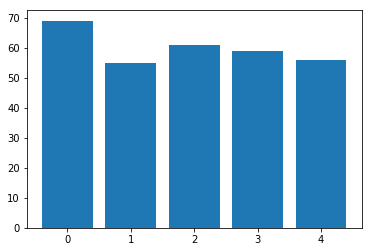

In [322]:
plt.bar(group_index.group, group_index.cnt)
plt.show()

In [ ]:
df.head()

In [ ]:
df.keys()

In [ ]:
df.to_csv("random-data.csv", sep=',', encoding='utf-8', index=False)